# 世界杯预测

来源于微信CSDN推送，仅仅用于个人学习与练习。


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

导入数据库

In [2]:
#load data
world_cup = pd.read_csv('datasets/World Cup 2018 Dataset.csv')
results = pd.read_csv('datasets/results.csv')

加载数据集

In [3]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [4]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [5]:
#目标差异和结果列添加到结果数据集中
winner = []
for i in range (len(results['home_team'])):
    if results['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i]);
    elif results['home_score'][i] < results['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal different column
results['goal_different'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_different
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [6]:
#着重处理尼日利亚数据 寻找特征值
df = results[(results['home_team'] == 'Nigeria') | (results['away_team'] == 'Nigeria')]
nigeria = df.iloc[:]
nigeria.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_different
2977,1949-10-08,Sierra Leone,Nigeria,0,2,Friendly,Freetown,Sierra Leone,Nigeria,2
3050,1950-05-28,Ghana,Nigeria,1,0,Friendly,Accra,Gold Coast,Ghana,1
3219,1951-10-20,Nigeria,Ghana,5,0,Friendly,Lagos,Nigeria,Nigeria,5
3492,1953-10-11,Ghana,Nigeria,1,0,Friendly,Accra,Gold Coast,Ghana,1
3654,1954-10-30,Nigeria,Ghana,3,0,Friendly,Lagos,Nigeria,Nigeria,3


In [7]:
#选择1930年以后的赛事
year = []
for row in nigeria['date']:
    year.append(int(row[:4]))
nigeria['match_year'] = year
nigeria_1970 = nigeria[nigeria.match_year >= 1970]
nigeria_1970.count()

date              469
home_team         469
away_team         469
home_score        469
away_score        469
tournament        469
city              469
country           469
winning_team      469
goal_different    469
match_year        469
dtype: int64

In [8]:
nigeria_1970.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_different,match_year
7535,1970-11-08,Nigeria,Congo,0,0,African Cup of Nations qualification,Ibadan,Nigeria,Draw,0,1970
7573,1970-11-22,Congo,Nigeria,2,1,African Cup of Nations qualification,Brazzaville,Congo,Congo,1,1970
7609,1971-02-13,Nigeria,Sierra Leone,1,0,Friendly,Lagos,Nigeria,Nigeria,1,1971
7918,1971-11-27,Nigeria,Burkina Faso,4,0,Friendly,Lagos,Nigeria,Nigeria,4,1971
7927,1971-12-01,Guinea,Nigeria,3,0,Friendly,Conakry,Guinea,Guinea,3,1971


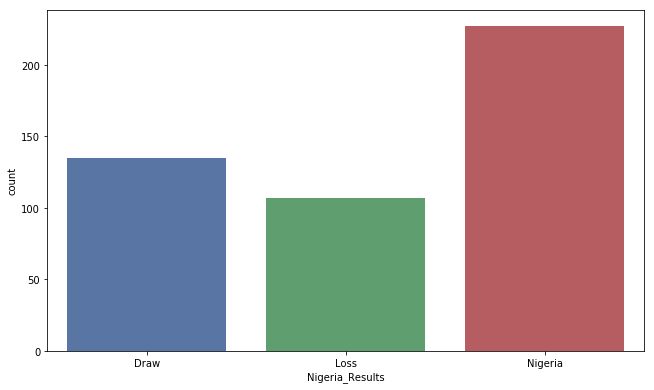

In [9]:
#what is the common game outcome for nigeria visualisation
wins = []
for row in nigeria_1970['winning_team']:
    if row != 'Nigeria' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Nigeria_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Nigeria_Results', data=winsdf)

In [10]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date              20565
home_team         20565
away_team         20565
home_score        20565
away_score        20565
tournament        20565
city              20565
country           20565
winning_team      20565
goal_different    20565
dtype: int64

In [11]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_different
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,England,1


In [12]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1970 = df_teams[df_teams.match_year >= 1970]
df_teams_1970.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_different,match_year
7281,1970-01-14,England,Netherlands,0,0,Friendly,London,England,Draw,0,1970
7283,1970-02-04,Peru,Czechoslovakia,0,2,Friendly,Lima,Peru,Czechoslovakia,2,1970
7287,1970-02-07,Egypt,Guinea,4,1,African Cup of Nations,Wad Madani,Sudan,Egypt,3,1970
7288,1970-02-07,Peru,Czechoslovakia,2,1,Friendly,Lima,Peru,Peru,1,1970
7292,1970-02-09,Egypt,Ghana,1,1,African Cup of Nations,Wad Madani,Sudan,Draw,0,1970


In [13]:
#dropping columns that wll not affect matchoutcomes
df_teams_1970 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_different', 'match_year'], axis=1)
df_teams_1970.head()

,home_team,away_team,winning_team
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
10,England,Wales,England
11,England,Scotland,England


In [14]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1970 = df_teams_1970.reset_index(drop=True)
df_teams_1970.loc[df_teams_1970.winning_team == df_teams_1970.home_team,'winning_team']=2
df_teams_1970.loc[df_teams_1970.winning_team == 'Draw', 'winning_team']=1
df_teams_1970.loc[df_teams_1970.winning_team == df_teams_1970.away_team, 'winning_team']=0

df_teams_1970.head()

,home_team,away_team,winning_team
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,England,Wales,2
4,England,Scotland,2


In [15]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1970, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
final.head()

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.572
Test set accuracy:  0.556


In [18]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets
ranking = pd.read_csv('datasets/fifa_rankings.csv') 
fixtures = pd.read_csv('datasets/fixtures.csv')

# List for storing the group stage games
pred_set = []

In [19]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6.0,25.0,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,NaN
44,3,60.0,10.0,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,NaN
45,3,28.0,16.0,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,NaN
46,3,55.0,14.0,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,NaN
47,3,13.0,3.0,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,NaN


In [20]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winning_team
0,Saudi Arabia,Russia,None
1,Egypt,Uruguay,None
2,Morocco,Iran,None
3,Spain,Portugal,None
4,Australia,France,None


In [21]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#group matches 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

Russia and Saudi Arabia
Winner: Russia
Probability of Russia winning:  0.664
Probability of Draw:  0.220
Probability of Saudi Arabia winning:  0.115

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.590
Probability of Draw:  0.341
Probability of Egypt winning:  0.069

Iran and Morocco
Draw
Probability of Iran winning:  0.236
Probability of Draw:  0.429
Probability of Morocco winning:  0.335

Portugal and Spain
Draw
Probability of Portugal winning:  0.297
Probability of Draw:  0.351
Probability of Spain winning:  0.351

France and Australia
Winner: France
Probability of France winning:  0.628
Probability of Draw:  0.222
Probability of Australia winning:  0.151

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.822
Probability of Draw:  0.144
Probability of Iceland winning:  0.034

Peru and Denmark
Winner: Peru
Probability of Peru winning:  0.440
Probability of Draw:  0.166
Probability of Denmark winning:  0.394

Croatia and Nigeria
Winner: 

In [23]:
# List of tuples before 
group_16 = [('Uruguay', 'Portugal'),
            ('France', 'Croatia'),
            ('Brazil', 'Mexico'),
            ('England', 'Colombia'),
            ('Spain', 'Russia'),
            ('Argentina', 'Peru'),
            ('Germany', 'Switzerland'),
            ('Poland', 'Belgium')]

In [25]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [26]:
clean_and_predict(group_16, ranking, final, logreg)

Portugal and Uruguay
Winner: Portugal
Probability of Portugal winning:  0.429
Probability of Draw:  0.290
Probability of Uruguay winning:  0.281

France and Croatia
Winner: France
Probability of France winning:  0.466
Probability of Draw:  0.268
Probability of Croatia winning:  0.266

Brazil and Mexico
Winner: Brazil
Probability of Brazil winning:  0.691
Probability of Draw:  0.206
Probability of Mexico winning:  0.103

England and Colombia
Winner: England
Probability of England winning:  0.534
Probability of Draw:  0.348
Probability of Colombia winning:  0.117

Spain and Russia
Winner: Spain
Probability of Spain winning:  0.550
Probability of Draw:  0.267
Probability of Russia winning:  0.182

Argentina and Peru
Winner: Argentina
Probability of Argentina winning:  0.719
Probability of Draw:  0.209
Probability of Peru winning:  0.072

Germany and Switzerland
Winner: Germany
Probability of Germany winning:  0.671
Probability of Draw:  0.199
Probability of Switzerland winning:  0.131

Be

In [27]:
# List of matches
quarters = [('Portugal', 'France'),
            ('Spain', 'Argentina'),
            ('Brazil', 'England'),
            ('Germany', 'Belgium')]

In [28]:
clean_and_predict(quarters, ranking, final, logreg)

Portugal and France
Winner: Portugal
Probability of Portugal winning:  0.432
Probability of Draw:  0.282
Probability of France winning:  0.286

Argentina and Spain
Winner: Argentina
Probability of Argentina winning:  0.523
Probability of Draw:  0.255
Probability of Spain winning:  0.222

Brazil and England
Winner: Brazil
Probability of Brazil winning:  0.504
Probability of Draw:  0.233
Probability of England winning:  0.262

Germany and Belgium
Winner: Germany
Probability of Germany winning:  0.587
Probability of Draw:  0.249
Probability of Belgium winning:  0.163



In [29]:
# List of matches
semi = [('Portugal', 'Brazil'),
        ('Argentina', 'Germany')]
clean_and_predict(semi, ranking, final, logreg)

Brazil and Portugal
Winner: Brazil
Probability of Brazil winning:  0.689
Probability of Draw:  0.162
Probability of Portugal winning:  0.149

Germany and Argentina
Winner: Germany
Probability of Germany winning:  0.454
Probability of Draw:  0.258
Probability of Argentina winning:  0.287



In [31]:
# Finals
finals = [('France', 'Germany')]
clean_and_predict(finals, ranking, final, logreg)

Germany and France
Winner: Germany
Probability of Germany winning:  0.548
Probability of Draw:  0.215
Probability of France winning:  0.237

